In [1]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-l58ojjsd
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-l58ojjsd
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=c755130b4fe019dc744004441c8e7174446435b56cb2549cd78e6fd8eb71c6f3
  Stored in directory: /tmp/pip-ephem-wheel-cache-ea23fz4f/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [2]:
!pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: h5py, numpy, six, scipy, keras, pyyaml, pillow
Required-by: 


In [3]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 9.5MB/s 
  Created wheel for mtcnn: filename=mtcnn-0.0.9-cp36-none-any.whl size=2257690 sha256=8728c968476279f049b033bc52f1e4a40d55b58d8efeebe1f13c094e6c95092f
  Stored in directory: /root/.cache/pip/wheels/85/81/65/6363fa5aafd7a155c896591e0c7c6e27b69642aa82b9cbf076
Successfully built mtcnn


In [5]:
!wget https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/sharon_stone1.jpg

--2019-11-08 13:00:54--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/sharon_stone1.jpg
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... 108.161.188.224
Connecting to 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)|108.161.188.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82711 (81K) [image/jpeg]
Saving to: ‘sharon_stone1.jpg’

sharon_stone1.jpg   100%[===================>]  80.77K  --.-KB/s    in 0.007s  

2019-11-08 13:00:54 (11.0 MB/s) - ‘sharon_stone1.jpg’ saved [82711/82711]



In [6]:
# example of face detection with mtcnn
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

In [0]:
# Extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
	# load image from file
	pixels = pyplot.imread(filename)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array







Instructions for updating:
Deprecated in favor of operator or tf.math.divide.



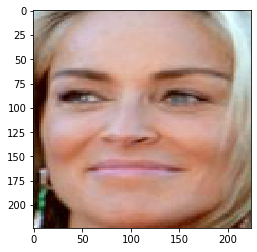

In [8]:
# load the photo and extract the face
pixels = extract_face('sharon_stone1.jpg')
# plot the extracted face
pyplot.imshow(pixels)
# show the plot
pyplot.show()

In [9]:
# Example of face detection with a vggface2 model
from numpy import expand_dims
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

Using TensorFlow backend.


In [0]:
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)

In [11]:
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)










165445632/165439116 [==============================] - 5s 0us/step


In [12]:
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
	print('%s: %.3f%%' % (result[0], result[1]*100))

1351680/1346516 [==============================] - 1s 0us/step
b' Sharon_Stone': 99.642%
b' Noelle_Reno': 0.085%
b' Elisabeth_R\xc3\xb6hm': 0.033%
b' Anita_Lipnicka': 0.026%
b' Tina_Maze': 0.019%


In [13]:
!wget https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/channing_tatum.jpg

--2019-11-08 13:10:45--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/channing_tatum.jpg
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... 108.161.188.224
Connecting to 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)|108.161.188.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 230984 (226K) [image/jpeg]
Saving to: ‘channing_tatum.jpg’

channing_tatum.jpg  100%[===================>] 225.57K  --.-KB/s    in 0.02s   

2019-11-08 13:10:45 (9.97 MB/s) - ‘channing_tatum.jpg’ saved [230984/230984]



In [0]:
pixels = extract_face('channing_tatum.jpg')

In [15]:
# convert one face into samples
pixels = pixels.astype('float32')
samples = expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)
# create a vggface model
model = VGGFace(model='resnet50')
# perform prediction
yhat = model.predict(samples)
# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
	print('%s: %.3f%%' % (result[0], result[1]*100))

b' Channing_Tatum': 94.433%
b' Eoghan_Quigg': 0.146%
b' Les_Miles': 0.113%
b' Ibrahim_Afellay': 0.072%
b' Tovah_Feldshuh': 0.070%


In [0]:
# face verification with the VGGFace2 model
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

In [0]:
# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames):
	# extract faces
	faces = [extract_face(f) for f in filenames]
	# convert into an array of samples
	samples = asarray(faces, 'float32')
	# prepare the face for the model, e.g. center pixels
	samples = preprocess_input(samples, version=2)
	# create a vggface model
	model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
	# perform prediction
	yhat = model.predict(samples)
	return yhat

In [0]:
# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
	# calculate distance between embeddings
	score = cosine(known_embedding, candidate_embedding)
	if score <= thresh:
		print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
	else:
		print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))


In [19]:
!wget https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/sharon_stone2.jpg

--2019-11-08 13:20:00--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/sharon_stone2.jpg
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... 108.161.188.224
Connecting to 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)|108.161.188.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38658 (38K) [image/jpeg]
Saving to: ‘sharon_stone2.jpg’

sharon_stone2.jpg   100%[===================>]  37.75K  --.-KB/s    in 0.01s   

2019-11-08 13:20:01 (3.53 MB/s) - ‘sharon_stone2.jpg’ saved [38658/38658]



In [20]:
!wget https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/sharon_stone3.jpg

--2019-11-08 13:20:18--  https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/03/sharon_stone3.jpg
Resolving 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)... 108.161.188.224
Connecting to 3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com (3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com)|108.161.188.224|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4352336 (4.2M) [image/jpeg]
Saving to: ‘sharon_stone3.jpg’

sharon_stone3.jpg   100%[===================>]   4.15M  5.46MB/s    in 0.8s    

2019-11-08 13:20:19 (5.46 MB/s) - ‘sharon_stone3.jpg’ saved [4352336/4352336]



In [21]:
# define filenames
filenames = ['sharon_stone1.jpg', 'sharon_stone2.jpg',
	'sharon_stone3.jpg', 'channing_tatum.jpg']
# get embeddings file filenames
embeddings = get_embeddings(filenames)

94699520/94694792 [==============================] - 3s 0us/step


In [22]:
# define sharon stone
sharon_id = embeddings[0]
# verify known photos of sharon
print('Positive Tests')
is_match(embeddings[0], embeddings[1])
is_match(embeddings[0], embeddings[2])

Positive Tests
>face is a Match (0.418 <= 0.500)
>face is a Match (0.295 <= 0.500)


In [23]:
# verify known photos of other people
print('Negative Tests')
is_match(embeddings[0], embeddings[3])

Negative Tests
>face is NOT a Match (0.709 > 0.500)
